## 1. Import the relevant libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

## 2. Load and create features and targets

In [2]:
df = pd.read_csv('Click_on_advertisement_preprossed.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  956 non-null    float64
 1   Age                       956 non-null    float64
 2   Area Income               956 non-null    float64
 3   Daily Internet Usage      956 non-null    float64
 4   Clicked on Ad             956 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.5 KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35.0,61833.90,256.09,0
1,69.47,26.0,59785.94,236.50,0


### 2.1. Create the targets

* Given the nature of the data, the ML models to be applied will be classification models. 
* The variable to be predicted (target) will be 'Clicked on Add'. 
* This is a binary classification, where 1 represents clicked on Ad and 0 the opposite.

In [3]:
targets = df['Clicked on Ad']
targets

0      0
1      0
2      0
3      0
4      0
      ..
951    1
952    1
953    1
954    0
955    1
Name: Clicked on Ad, Length: 956, dtype: int64

### 2.2. Create the features

In [4]:
unscaled_inputs=df.iloc[:,:-1]
unscaled_inputs

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35.0,61833.90,256.09
1,69.47,26.0,59785.94,236.50
2,74.15,29.0,54806.18,245.89
3,68.37,35.0,73889.99,225.58
4,88.91,33.0,53852.85,208.36
...,...,...,...,...
951,72.97,30.0,71384.57,208.58
952,51.30,45.0,67782.17,134.42
953,51.63,51.0,42415.72,120.37
954,55.55,19.0,41920.79,187.95


# 3. Machine learning models

Due to the nature of the models, this section will be handle as:

* ML models not affected by standardization: Naive Bayes, Random Forest, Decision trees
* ML models that perform better with standardization: Support Vector Machines, K-nearest Neighbours, Logistic regression

To check which is the best ML algorithm for this data set, the accuracy (ratio of correctly predicted instances divided by the total number of instances in the dataset multiplied) will be compared.

**Split the data for training and testing**

In [5]:
#Checking the data to feed
train_test_split(unscaled_inputs,targets)

[     Daily Time Spent on Site   Age  Area Income  Daily Internet Usage
 929                     40.18  29.0     50760.23                151.96
 407                     83.55  39.0     65816.38                221.18
 166                     46.31  57.0     44248.52                153.98
 174                     77.20  33.0     49325.48                254.05
 737                     71.14  30.0     69758.31                224.82
 ..                        ...   ...          ...                   ...
 873                     87.18  31.0     58287.86                193.60
 73                      56.89  37.0     37334.78                109.29
 950                     43.70  28.0     63126.96                173.01
 69                      57.76  41.0     47861.93                105.15
 343                     74.62  36.0     73207.15                217.79
 
 [717 rows x 4 columns],
      Daily Time Spent on Site   Age  Area Income  Daily Internet Usage
 220                     80.03  44.0 

80% of the data will be assigned for training and the remaining 20% will be used for tasting the model.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs,targets, train_size = 0.8, random_state = 10)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(764, 4) (764,)
(192, 4) (192,)


## 3.1. ML models not affected by standardization

### 3.1.1. Naive Bayes Classifier

In [7]:
#train the model
NBmodel = GaussianNB()
NBmodel.fit(x_train, y_train)

GaussianNB()

In [8]:
# Accuracy of the model with the training set
NB_accuracy_train = NBmodel.score(x_train, y_train)
NB_accuracy_train

0.9698952879581152

In [9]:
#Accuracy of the model with the test set
NB_accuracy_test = NBmodel.score(x_test,y_test)
NB_accuracy_test

0.9375

In [10]:
#Metrics to evaluate the model
y_predicted = NBmodel.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        98
           1       0.93      0.95      0.94        94

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



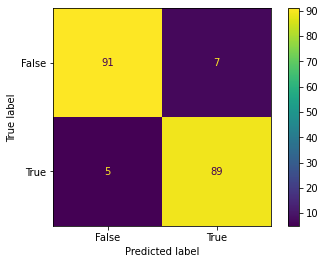

In [11]:
#Confusion matrix to compare 
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

The **Naive Bayes Classifier model** is able to classify the  'Clicked on Ad' target with **93.75** accuracy on the test set. However, it should be noted that this algorithm takes all features as independent and also assumes a normal distribution. The dataset showed some correlations between features, as seen in the Pearson Correlation heatmap. In addition, the data had skewed distributions, so the condition of having a normal distribution was not fulfilled.

### 3.1.2. Decision Tree Classifier

In [12]:
#train the model max_depth=3
DTmodel_deep3 = DecisionTreeClassifier(max_depth=3, random_state = 10)
DTmodel_deep3 = DTmodel_deep3.fit(x_train, y_train)
# Accuracy of the model with the training set
DT_accuracy_train_deep3 = DTmodel_deep3.score(x_train, y_train)
print(f'the training accuracy is:{DT_accuracy_train_deep3}')
DT_accuracy_test_deep3 = DTmodel_deep3.score(x_test,y_test)
print(f'the test accuracy is: {DT_accuracy_test_deep3}')

the training accuracy is:0.9712041884816754
the test accuracy is: 0.9270833333333334


In [13]:
#train the model max_depth=4
DTmodel_deep4 = DecisionTreeClassifier(max_depth=4, random_state = 10)
DTmodel_deep4 = DTmodel_deep4.fit(x_train, y_train)
# Accuracy of the model with the training set
DT_accuracy_train_deep4 = DTmodel_deep4.score(x_train, y_train)
print(f'the training accuracy is:{DT_accuracy_train_deep4}')
DT_accuracy_test_deep4 = DTmodel_deep4.score(x_test,y_test)
print(f'the test accuracy is: {DT_accuracy_test_deep4}')

the training accuracy is:0.9790575916230366
the test accuracy is: 0.9322916666666666


In [14]:
#train the model max_depth=5
DTmodel_deep5 = DecisionTreeClassifier(max_depth=5, random_state = 10)
DTmodel_deep5 = DTmodel_deep5.fit(x_train, y_train)
# Accuracy of the model with the training set
DT_accuracy_train_deep5 = DTmodel_deep5.score(x_train, y_train)
print(f'the training accuracy is:{DT_accuracy_train_deep5}')
DT_accuracy_test_deep5 = DTmodel_deep5.score(x_test,y_test)
print(f'the test accuracy is: {DT_accuracy_test_deep5}')

the training accuracy is:0.9869109947643979
the test accuracy is: 0.9166666666666666


Comparing the test accuracy of the model with different depths, it is seen that the model with best performance has a depth of 4. Thus, this model will be taken for further calculations

In [15]:
#Metrics to evaluate the model
y_predicted =DTmodel_deep4.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.93      0.94      0.93        94

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



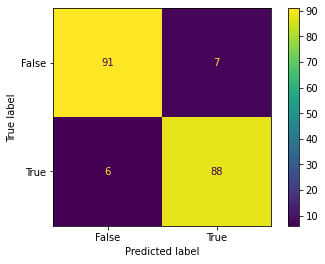

In [16]:
#Confusion matrix to compare 
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

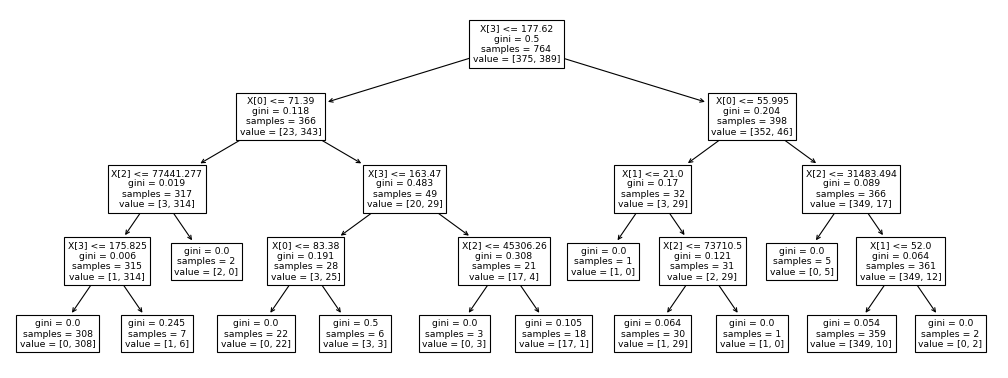

In [17]:
#Decision tree classifier plot 
figure(figsize=(16, 6), dpi=80)
tree.plot_tree(DTmodel_deep4)
plt.show()

For this model, the feature with the highest weight is ‘ Daily Internet Usage’, as it is located at node zero. Next, the second most relevant feature is ‘Daily Time Spent on Site’. After this, the nodes of the tree are distributed along the different features obtaining a model that predicted the 'Clicked on Ad' target with 93.23% accuracy in the test set.(2)

### 3.1.3. Random Forest Classifier

In [18]:
#train the model
RFmodel = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
RFmodel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [19]:
# Accuracy of the model with the training set
RF_accuracy_train = RFmodel.score(x_train, y_train)
RF_accuracy_train

0.9960732984293194

In [20]:
#Accuracy of the model with the test set
RF_accuracy_test = RFmodel.score(x_test,y_test)
RF_accuracy_test

0.9322916666666666

In [21]:
#Metrics to evaluate the model
y_predicted =RFmodel.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.93      0.94      0.93        94

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



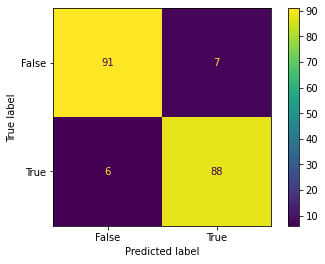

In [22]:
#Confusion matrix to compare 
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

The ** Random Forest Classifier ** classifies the 'Clicked on Ad' target with 92.71% accuracy in the test set. Given that the RFC creates random decision trees to generate the model and therefore generates multiple layers that are more difficult to interpret, thus, the DTC might be a better option since has an easier interpretation and a higher accuracy level.(3)

## 3.2. ML models affected by standardization

**Feature Scaling**
To have a better performance of the ML algorithms the data should be scaled so that the magnitudes of each feature do not affect the model.
To define the best scaling method, the features will be explored against the target and the presence of outliers will be determined.(2)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

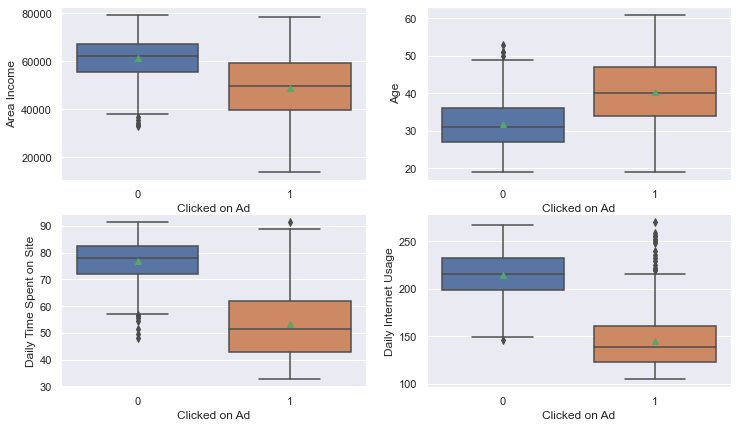

In [23]:
sns.set(rc={'figure.figsize':(12,7)})

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='Clicked on Ad', y='Area Income',showmeans=True, ax=axes[0,0])
sns.boxplot(data=df, x='Clicked on Ad', y='Age',showmeans=True, ax=axes[0,1])
sns.boxplot(data=df, x='Clicked on Ad', y='Daily Time Spent on Site',showmeans=True, ax=axes[1,0])
sns.boxplot(data=df, x='Clicked on Ad', y='Daily Internet Usage',showmeans=True, ax=axes[1,1])

From the visual representation it is seen that the features present some outliers in the dataset. Thus, the RobustScaler standardization will be applied (1)

**Standardize the data**
To avoid data leakage the standardization will be done to training and testing data separately

In [24]:
RS_x_train = RobustScaler ()
x_train_RS = RS_x_train.fit_transform(x_train)
print(x_train_RS.shape)

RS_x_test = RobustScaler ()
x_test_RS = RS_x_test.fit_transform(x_test)
print(x_train_RS.shape)

(764, 4)
(764, 4)


### 3.2.1. Logistic regression model

In [25]:
#Train the model
reg = LogisticRegression()
reg.fit(x_train_RS, y_train)

LogisticRegression()

In [26]:
# Accuracy of the model with the training set
LRM_accuracy_train= reg.score(x_train_RS, y_train)
LRM_accuracy_train

0.9698952879581152

**Checking manually the accuracy**

In [27]:
model_outputs = reg.predict(x_train_RS)
model_outputs

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

In [28]:
model_outputs == y_train

140    False
452     True
754     True
437     True
647     True
       ...  
369     True
320     True
527     True
125     True
265     True
Name: Clicked on Ad, Length: 764, dtype: bool

In [29]:
np.sum(model_outputs == y_train)

741

In [30]:
model_outputs.shape[0]

764

In [31]:
np.sum(model_outputs == y_train)/model_outputs.shape[0]

0.9698952879581152

In [32]:
reg.intercept_

array([0.40575601])

In [33]:
reg.coef_

array([[-3.68940535,  1.78884131, -1.81305073, -3.78198759]])

In [34]:
feature_name = unscaled_inputs.columns.values
feature_name

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'], dtype=object)

In [35]:
summary_table = pd.DataFrame(columns = ['Feature_name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,Feature_name,Coefficient
0,Daily Time Spent on Site,-3.689405
1,Age,1.788841
2,Area Income,-1.813051
3,Daily Internet Usage,-3.781988


In [36]:
summary_table.index = summary_table.index + 1 
#shifts up all the indices by 1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
print('Logistic regression Coefficientes')
print(summary_table)

Logistic regression Coefficientes
               Feature_name  Coefficient
0                 Intercept     0.405756
1  Daily Time Spent on Site    -3.689405
2                       Age     1.788841
3               Area Income    -1.813051
4      Daily Internet Usage    -3.781988


**Test the model**

In [37]:
#Accuracy of the model with the test set
LRM_accuracy_test = reg.score(x_test_RS,y_test)
LRM_accuracy_test

0.9427083333333334

In [38]:
#Metrics to evaluate the model
y_predicted = reg.predict(x_test_RS)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        98
           1       0.94      0.95      0.94        94

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



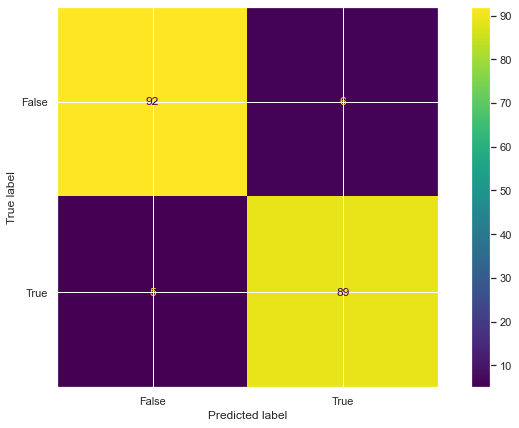

In [39]:
#Confusion matrix to compare 
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**Interpretation of the model**
The **logistic regression model** is able to classify the "Clicked on Ad" target with 94.27% accuracy in the test set. In addition, this model provides access to coefficients that allow determining which features have a higher weight in the prediction of the model. For this case the feature with the highest impact on clicking or not on Ad is Age.

### 3.2.2. K-Nearest Neighbour

In [40]:
#Train the model
KNNmodel = KNeighborsClassifier(n_neighbors=5)
# The number of neighbours is set to 2 since we are dealing with a binary classification
KNNmodel.fit(x_train_RS, y_train)

KNeighborsClassifier()

In [41]:
# Accuracy of the model with the training set
KNN_accuracy_train = KNNmodel.score(x_train_RS, y_train)
KNN_accuracy_train

0.9777486910994765

In [42]:
#Accuracy of the model with the test set
KNN_accuracy_test = KNNmodel.score(x_test_RS,y_test)
KNN_accuracy_test

0.9322916666666666

In [43]:
#Metrics to evaluate the model
y_predicted = KNNmodel.predict(x_test_RS)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        98
           1       0.95      0.91      0.93        94

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



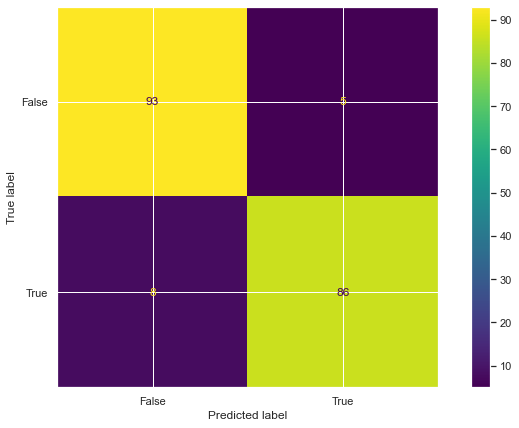

In [44]:
#Confusion matrix to compare 
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**Interpretation of the model** 

From the metrics given, the  **K-Nearest Neighbour model** is able to classified the target 'Clicked on Ad' with a 93% of accuracy

### 3.2.3. Support Vector Machines

In [45]:
#Train the model
SVMmodel = svm.SVC()
# The number of neighbours is set to 2 since we are dealing with a binary classification
SVMmodel.fit(x_train_RS, y_train)

SVC()

In [46]:
# Accuracy of the model with the training set
SVM_accuracy_train = SVMmodel.score(x_train_RS, y_train)
SVM_accuracy_train

0.9764397905759162

In [47]:
#Accuracy of the model with the test set
SVM_accuracy_test = SVMmodel.score(x_test_RS,y_test)
SVM_accuracy_test

0.9375

In [48]:
#Metrics to evaluate the model
y_predicted = SVMmodel.predict(x_test_RS)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        98
           1       0.94      0.94      0.94        94

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



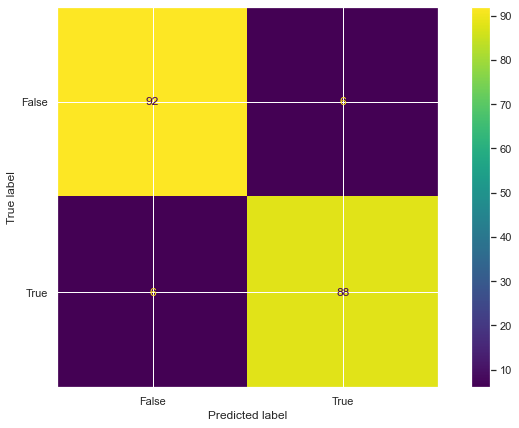

In [49]:
#Confusion matrix to compare 
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**Interpretation of the model** From the metrics given, the  **Support Vector Machines model** is able to classified the target 'Clicked on Ad' with a 94% of accuracy

## 3.3. Summary of results

In [50]:
dat = {'Model': ['Naive Bayes Classifier', 
                 'Decision Tree Classifier',
                 'Random Forest Classifier',
                 'Logistic regression model', 
                 'K-Nearest Neighbour',
                 'Support Vector Machines'],
       'training set':[NB_accuracy_train, DT_accuracy_train_deep4, RF_accuracy_train,LRM_accuracy_train, KNN_accuracy_train, SVM_accuracy_train],
       'test set':[NB_accuracy_test, DT_accuracy_test_deep4, RF_accuracy_test, LRM_accuracy_test, KNN_accuracy_test, SVM_accuracy_test]
       }
summary = pd.DataFrame(dat).sort_values(by=['test set'], ascending=False)
reset_index_summary = summary.reset_index(drop=True)
print(reset_index_summary)

                       Model  training set  test set
0  Logistic regression model      0.969895  0.942708
1     Naive Bayes Classifier      0.969895  0.937500
2    Support Vector Machines      0.976440  0.937500
3   Decision Tree Classifier      0.979058  0.932292
4   Random Forest Classifier      0.996073  0.932292
5        K-Nearest Neighbour      0.977749  0.932292


# 4.Conclusion
Comparing the values of accuracy it is seen that the best ML model for this dataset is the Logistic regression model with a test accuracy of 94.3%. Since this model offers high interpretability and also high accuracy for this dataset,the Logistic regression model is recommended to be chosen to predict if a user will click on an advertisement or not.

# 5. References
(1)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/
(3)https://github.com/ValentinRicher/understanding-decision-trees/blob/master/understanding_decision_trees.ipynb
(2) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html